In [296]:
import pandas as pd
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
from seaborn import heatmap

<h1>Question 1</h1>

https://www.kaggle.com/shivam2503/diamonds

In [297]:
df = pd.read_csv("diamonds.csv", index_col=0)

<b>price:</b> price in US dollars (326--18,823)<br>
    
<b>carat:</b> weight of the diamond (0.2--5.01)<br>
    
<b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)<br>
    
<b>color:</b> diamond colour, from J (worst) to D (best)<br>
    
<b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<br>
    
<b>x:</b> length in mm (0--10.74)<br>
    
<b>y:</b> width in mm (0--58.9)<br>
    
<b>z:</b> depth in mm (0--31.8)<br>
    
<b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)<br>
    
<b>table:</b> width of top of diamond relative to widest point (43--95)

In [298]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [299]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Here we are taking only the numeric columns from the dataset for demonstration purposes

In [300]:
subset = df.drop(["clarity", "color", "cut"], axis=1)

As we have seen above, the features have different units, so we can visualize their Gaussian probability distribution functions.

In [301]:
subset_scl = (subset - np.mean(subset)) / np.std(subset)

mean vector of the raw dataset

In [302]:
np.mean(subset)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

mean vector of the standardized dataset, expectedly, they all are very close to zero

In [303]:
meanVec = np.mean(subset_scl)
meanVec

carat    2.444878e-16
depth   -3.996902e-15
table    9.695207e-17
price   -9.273676e-17
x        2.782103e-16
y       -8.430615e-17
z       -2.002271e-16
dtype: float64

Variance vectors of the raw dataset and the scaled dataset, obviously, standardized dataset has a variance vector of ones

In [304]:
np.var(df)

carat    2.246825e-01
depth    2.052366e+00
table    4.992856e+00
price    1.591533e+07
x        1.258324e+00
y        1.304447e+00
z        4.980016e-01
dtype: float64

In [305]:
varVec = np.var(subset_scl)
varVec

carat    1.0
depth    1.0
table    1.0
price    1.0
x        1.0
y        1.0
z        1.0
dtype: float64

<AxesSubplot:>

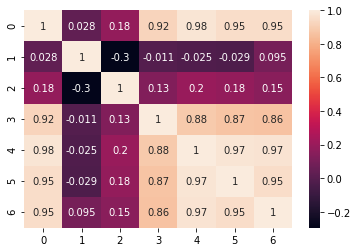

In [306]:
covMatrix = np.cov(subset_scl, rowvar=False)
heatmap(covMatrix, annot=True)

Here we are taking depth and table since they have the higest covariance in order to visualize them

In [307]:
# carat depth table price x y z
subset = subset_scl[["depth", "table"]]
covMatrix = np.cov(subset, rowvar=False)
varVec = np.var(subset)
meanVec = np.mean(subset)

<AxesSubplot:>

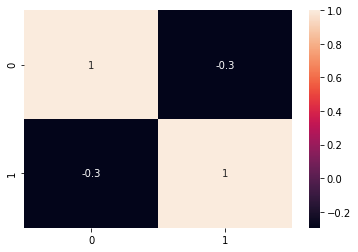

In [308]:
heatmap(covMatrix, annot=True)

In [309]:
meanVec

depth   -3.996902e-15
table    9.695207e-17
dtype: float64

we are assigning the mu and epsilon to those two features' mean and covariances

In [310]:
mu = meanVec.values
epsilon = covMatrix

In [311]:
def multivariate_gaussian_pdf(X, mu, epsilon):
    N = []
    k = X.shape[1]
    denom = np.sqrt((2*np.pi)**k * lin.det(epsilon))
    for x in X:
        nom = np.exp(lin.multi_dot([(x-mu).T, lin.inv(epsilon), (x-mu)]) * -0.5).astype("float64")
        N.append(nom / denom)
    return np.array(N)

Here is the multivariate gaussian probability distribution function implemented from scratch. To be able to visualize, we are going to use this function only for two variables

In [312]:
resolution = 100
x = np.outer(np.linspace(-2.5, 2.5, resolution), np.ones(resolution)) 
y = x.copy().T
xy_samples = np.vstack([x.ravel(), y.ravel()]).T
xy_samples = np.array(xy_samples)
xy_samples.shape

(10000, 2)

Heare I am creting a grid of ranged values which will be the X of our function

The range is selected as -2.5 to 2.5. Since we standardized the imput variables, they will be centered.

In [313]:
N = multivariate_gaussian_pdf(xy_samples, mu, epsilon)

In [314]:
z = N.reshape(resolution,resolution)

Here I am turning the 2D vector output to a grid of heights or z values

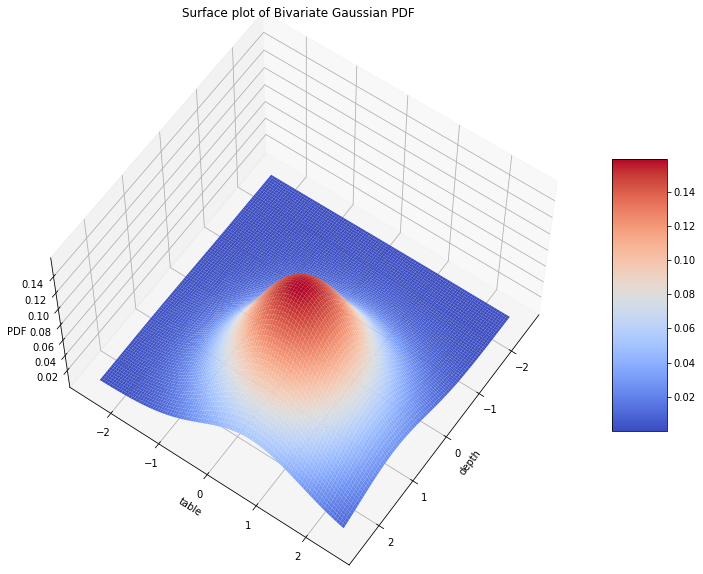

mu:	 [-0.  0.]
epsilon:
 [[ 1.     -0.2958]
 [-0.2958  1.    ]]


In [315]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('depth')
ax.set_ylabel('table')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Bivariate Gaussian PDF')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.show()
print("mu:\t", np.round(mu, 4))
print("epsilon:\n", np.round(epsilon, 4))

Here we can change the two variables and manipulate the mu and epsilon as well as change the range resolution to visualize various Gaussian probability distribution functions

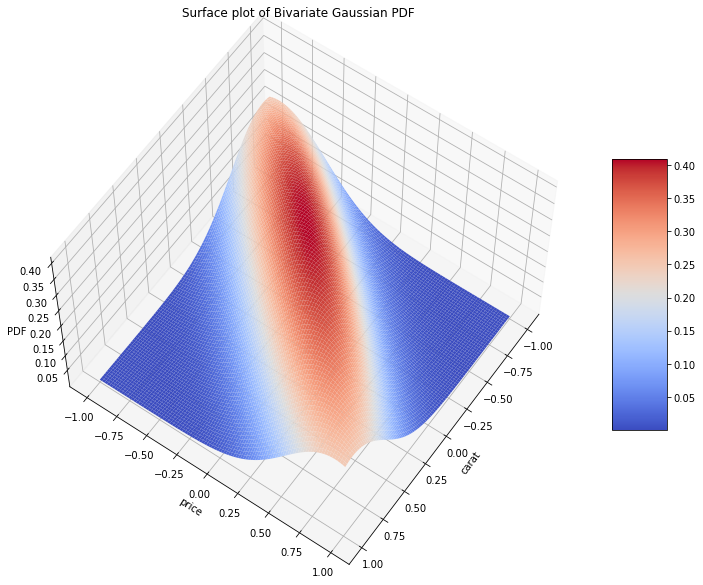

mu:	 [ 0. -0.]
epsilon:
 [[1.     0.9216]
 [0.9216 1.    ]]


In [405]:
# carat depth table price x y z
xl = "carat"
yl = "price"
axis_scale = 1
resolution = 100

subset = subset_scl[[xl, yl]]

epsilon = np.cov(subset, rowvar=False)   # + - * / 5
mu = np.mean(subset).values  # + - * / 5

x = np.outer(np.linspace(-axis_scale, axis_scale, resolution), np.ones(resolution)) 
y = x.copy().T
xy_samples = np.vstack([x.ravel(), y.ravel()]).T
xy_samples = np.array(xy_samples)

N = multivariate_gaussian_pdf(xy_samples, mu, epsilon)
z = N.reshape(resolution,resolution)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Bivariate Gaussian PDF')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.show()
print("mu:\t", np.round(mu, 4))
print("epsilon:\n", np.round(epsilon, 4))

<h1> Question 2 </h1>

Using the same dataset, we are going to create a regression problem. I will try to predict price, so our decision variable will be the "price" attribute.

<h2>preprocessing</h2>

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Here we see there is no missing value in the dataset and all but three attributes are numeric. Which is quite convenient for a regression problem.

In [318]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In this summary of numeric fields, we can notice that the minimum x, y, z measurements are zero. Which indicates either an error or some exceptional examples.<br> Either case, they will cause noise in the data so it is best to manage that.

In [319]:
df[(df[['x', 'y', 'z']] == 0).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Here are the examples with 0 on any of the dimentional measurements. There are only 20 of them so it is not so wasteful to just drop them.

In [320]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
df.shape

(53920, 10)

<h3>enumeration</h3>

Next, we can look into the three non-numeric variables.

In [321]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)<br>
    
<b>color:</b> diamond colour, from J (worst) to D (best)<br>
    
<b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<br>

Conveniently, they are all ordinal variables. We can enumarate them in their correct order and incorporate them into the rest of the features.

In [322]:
enum_cut = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
enum_color = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
enum_clarity = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

In [323]:
df.cut.replace(enum_cut, inplace=True)
df.color.replace(enum_color, inplace=True)
df.clarity.replace(enum_clarity, inplace=True)

In [324]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


We have our variables ready now we can take a look at the correlation heatmap to gain intuition about the relationship of the features.

In [325]:
df.corr().style.background_gradient()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134953,-0.291360,-0.352757,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
cut,-0.134953,1.000000,0.020517,0.189153,-0.218073,-0.433306,-0.053491,-0.126232,-0.122181,-0.150647
color,-0.291360,0.020517,1.000000,-0.025783,-0.047373,-0.026481,-0.172431,-0.270671,-0.263915,-0.270011
clarity,-0.352757,0.189153,-0.025783,1.000000,-0.067457,-0.160256,-0.146789,-0.372865,-0.359015,-0.370250
depth,0.028259,-0.218073,-0.047373,-0.067457,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.433306,-0.026481,-0.160256,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.053491,-0.172431,-0.146789,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.126232,-0.270671,-0.372865,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.122181,-0.263915,-0.359015,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,-0.150647,-0.270011,-0.370250,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


Main takeaways can be:<br>- The main contributor of a diamonds price is not-surprisingly its size.<br>- We also see that the dimentional measurements are almost perfectly correlated with the carat which is the weight of the diamond. Again, not a surprise since we expect every diamond to have the same density.<br>- Other features are showing rather small correlations compared to dimentional measurements and the weight.

<h2>Regression</h2

Declaretions of the helper functions in order to keep the code tidy and consistent as much as I can

In [326]:
def train_test_split(df: pd.DataFrame, y: str, ratio: float = 0.3):
    df = df.sample(frac=1, random_state=0)  # To shuffle the dataframe just in case
    X = df.drop(y, axis=1)
    Y = df[[y]]
    split = round(len(df)*ratio)
    X_test = X.iloc[:split]
    X_train = X.iloc[split:len(X)]
    Y_test = Y.iloc[:split]
    Y_train = Y.iloc[split:len(Y)]
    return X_train, Y_train, X_test, Y_test

In [327]:
def scale(df):
    norm = (df - np.mean(df)) / np.std(df)
    return norm

In [328]:
def log_scale(df):
    return np.log(df)

In [329]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse

<h3>Linear Regression (Ordinary Least Squares)</h3>

Linear regressionis the simplest form of regression where the decision variable is expressed as a linear combination of other variables. There is no constraint on the decision variable or the attributes

We will start by splitting our data and standardizing the X part to eliminate the effect of unit

In [330]:
x_train, y_train, x_test, y_test = train_test_split(df, "price")
x_train = scale(x_train)
x_test = scale(x_test)

I am also scaling the decision variable price in log scale. This is only to prevent our regression models from predicting negative prices thus making slightly better predictions.

In [331]:
y_train = log_scale(y_train)
y_test = log_scale(y_test)

Here we define our linear regression model and fitting the training set to the model.

In [332]:
ols = lm.LinearRegression()
ols.fit(x_train, y_train)

LinearRegression()

In [333]:
labels = list(x_train.columns)
labels.insert(0, 'intercept')

Here I am initiating the report that i will be appending along the way.

In [334]:
ols_intersept = ols.intercept_
ols_coefficients = ols.coef_[0]
values = list(np.append(np.round(ols_intersept,6), np.round(ols_coefficients,6)))

In [335]:
report = pd.DataFrame(np.vstack([labels, values]).T, columns=["Model", "OLS"])

In [336]:
report

,Model,OLS
0,intercept,7.783862
1,carat,-0.516229
2,cut,0.030555
3,color,0.133078
4,clarity,0.198389
5,depth,0.087056
6,table,0.020634
7,x,0.95048
8,y,0.621985
9,z,0.02033


After reporting the coefficients we can make a prediction and to score our prediction we are using mean squared error, average squared distances between our predictions and the real values

We will be reporting both the training error and the test error to detect if there is any overfitting.

In [337]:
ols_pred_train = ols.predict(x_train)
ols_pred_test = ols.predict(x_test)

In [338]:
ols_train_error = mse(y_train, ols_pred_train)
ols_test_error = mse(y_test, ols_pred_test)
print("training error:", ols_train_error)
print("test error:", ols_test_error)

training error: 0.02207466367172455
test error: 0.0773559315050056


Looking at the difference between training and test errors, we might say that this is a case of overfitting.

In [339]:
report = report.append({"Model": "training mse", "OLS": ols_train_error}, ignore_index=True)
report = report.append({"Model": "test mse", "OLS": ols_test_error}, ignore_index=True)

After saving the score, we can visualize a sample of predictions to have an intiutive idea about how well the model does

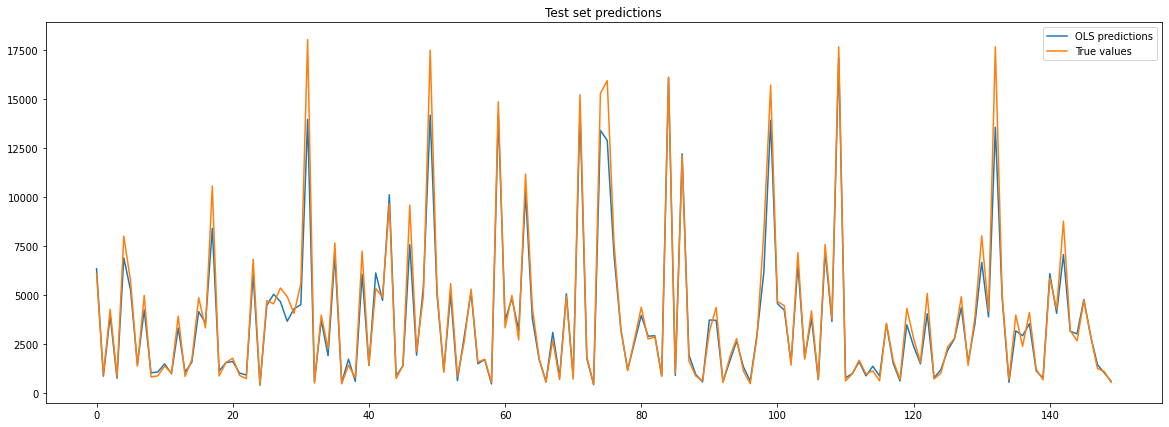

In [340]:
sample_size = 150
y_pred = np.exp(ols_pred_test)
y_true = np.exp(y_test)
x = [i for i in range(sample_size)]
fig = plt.figure(figsize=(20,7))
plt.plot(x, y_pred[:sample_size], label = "OLS predictions")
plt.plot(x, y_true[:sample_size], label = "True values")
plt.title("Test set predictions")
plt.legend()
plt.show()

According to the graph, the predictions seem reasonable. But let's look at other regression models.

<h3>Ridge Regression</h3>

With ridge regression we are introducing the concept of regularization. Ridge regression has an additional constant to its loss function which is alpha (regularization constant) times the L2 norm of the coefficients. This penalizes the large coefficients and pushes the coefficients to the smaller values.

Ridge regression loss penalty: 
\begin{align*}
\frac{\alpha}{2N}\sum_{i=1}^{m}{W_i^2}
\end{align*}

In [341]:
ridge = lm.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

Here I am giving alpha an arbitrary value. We can test how it performs and later try to find a better alpha

In [342]:
ridge_intersept = ridge.intercept_
ridge_coefficients = ridge.coef_[0]
values = list(np.append(ridge_intersept, ridge_coefficients))

Predictions with Ridge

In [343]:
ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)
ridge_train_error = mse(y_train, ridge_pred_train)
ridge_test_error = mse(y_test, ridge_pred_test)
print("training error:", ridge_train_error)
print("test error:", ridge_test_error)

training error: 0.022074664382599328
test error: 0.07740819977101049


We see that Ridge model did not perform better enough than the OLS model but let's compare them

In [344]:
values.append(ridge_train_error)
values.append(ridge_test_error)

In [345]:
report["Ridge-0.1"] = values

In [346]:
report

,Model,OLS,Ridge-0.1
0,intercept,7.783862,7.783862
1,carat,-0.516229,-0.516139
2,cut,0.030555,0.030557
3,color,0.133078,0.133078
4,clarity,0.198389,0.198384
5,depth,0.087056,0.087048
6,table,0.020634,0.020637
7,x,0.95048,0.950061
8,y,0.621985,0.622271
9,z,0.02033,0.020372


We can clearly see that an alpha of 0.1 did not differ much from the Linear Regression, which is actually same as Ridge regression with an alpha of zero.

Now to find a better alpha, we are going to implement Ridge with cross validation in order to calculate mse scores for a list of candidate alphas and select the best one.

In [347]:
ridgecv = lm.RidgeCV(alphas=[i/1000 for i in range(1,10)])
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]))

In [348]:
ridgecv.alpha_

0.001

After some trials we can see that RidgeCV is always favouring the smallest possible alpha. This means that the model does not suffer from coefficients being too large. In other words, Ridge regression is unable to perform better than Linear regression.

Regardless of the effect, we are reporting the experiment

In [349]:
ridgecv_intersept = ridgecv.intercept_
ridgecv_coefficients = ridgecv.coef_[0]
values = list(np.append(ridge_intersept, ridge_coefficients))
ridgecv_pred_train = ridgecv.predict(x_train)
ridgecv_pred_test = ridgecv.predict(x_test)
ridgecv_train_error = mse(y_train, ridgecv_pred_train)
ridgecv_test_error = mse(y_test, ridgecv_pred_test)
print("training error:", ridgecv_train_error)
print("test error:", ridgecv_test_error)

training error: 0.022074663691229963
test error: 0.0773566445387047


In [350]:
values.append(ridgecv_train_error)
values.append(ridgecv_test_error)
report["Ridge-0.001"] = values
report

,Model,OLS,Ridge-0.1,Ridge-0.001
0,intercept,7.783862,7.783862,7.783862
1,carat,-0.516229,-0.516139,-0.516139
2,cut,0.030555,0.030557,0.030557
3,color,0.133078,0.133078,0.133078
4,clarity,0.198389,0.198384,0.198384
5,depth,0.087056,0.087048,0.087048
6,table,0.020634,0.020637,0.020637
7,x,0.95048,0.950061,0.950061
8,y,0.621985,0.622271,0.622271
9,z,0.02033,0.020372,0.020372


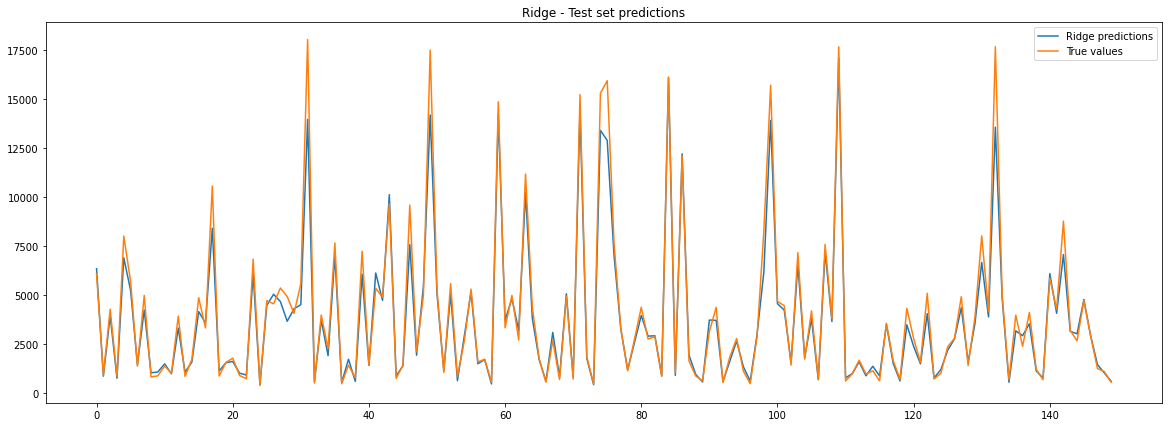

In [351]:
sample_size = 150
y_pred = np.exp(ridge_pred_test)
y_true = np.exp(y_test)
x = [i for i in range(sample_size)]
fig = plt.figure(figsize=(20,7))
plt.plot(x, y_pred[:sample_size], label = "Ridge predictions")
plt.plot(x, y_true[:sample_size], label = "True values")
plt.title("Ridge - Test set predictions")
plt.legend()
plt.show()

As demonstrated by the metrics, the ridge regression did not perform significantly better than OLS

<h3>Lasso Regression</h3>

Lasso is a similar method to the Ridge except does not penalize by adding the L2 norm of the weights, it adds the L1 norm. Which means now the coefficients can be equal to zero. This is especially useful when we fit the entire dataset to a regression model without checking the relationships of the features more closely.

Ridge regression loss penalty: 
\begin{align*}
\frac{\alpha}{2N}\sum_{i=1}^{m}{|W_i|}
\end{align*}

0 coefficient will mean that Lasso deemed that feature useless.

In [352]:
lasso = lm.Lasso(alpha=0.1)

Here I selected an arbitrary alpha as I did before

In [353]:
lasso.fit(x_train, y_train)
lasso_intersept = lasso.intercept_
lasso_coefficients = lasso.coef_
values = list(np.append(lasso_intersept, lasso_coefficients))

In [354]:
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)
lasso_train_error = mse(y_train, lasso_pred_train)
lasso_test_error = mse(y_test, lasso_pred_test)
print("training error:", lasso_train_error)
print("test error:", lasso_test_error)

training error: 0.08577504489526921
test error: 0.15669030363942063


In [355]:
values.append(lasso_train_error)
values.append(lasso_test_error)
report["Lasso-0.1"] = values
report

,Model,OLS,Ridge-0.1,Ridge-0.001,Lasso-0.1
0,intercept,7.783862,7.783862,7.783862,7.783862
1,carat,-0.516229,-0.516139,-0.516139,0.000000
2,cut,0.030555,0.030557,0.030557,0.000000
3,color,0.133078,0.133078,0.133078,0.000000
4,clarity,0.198389,0.198384,0.198384,0.006713
5,depth,0.087056,0.087048,0.087048,0.000000
6,table,0.020634,0.020637,0.020637,-0.000000
7,x,0.95048,0.950061,0.950061,0.212798
8,y,0.621985,0.622271,0.622271,0.648181
9,z,0.02033,0.020372,0.020372,0.017865


Above we see that most of the attributes were set to zero. This shows that 0.1 for alpha is too big

As we did before with Ridge, we are going to implement Lasso with cross validation to find a better alpha.

In [356]:
lassocv = lm.LassoCV(max_iter=5000)

LassoCV performs, by default, 5-fold cross-validation with different values of alpha. Since it performs an optimisation in itself, we can assume the alpha that is found this way would perform better than 0.1

In [357]:
lassocv.fit(x_train, y_train.unstack())

LassoCV(max_iter=5000)

In [358]:
lassocv.alpha_

0.0009755109772265135

Inherit optimizer found the optimal alpha as something close to 0.001

In [359]:
lassocv_intersept = lassocv.intercept_
lassocv_coefficients = lassocv.coef_
values = list(np.append(lassocv_intersept, lassocv_coefficients))
lassocv_pred_train = lassocv.predict(x_train)
lassocv_pred_test = lassocv.predict(x_test)
lassocv_train_error = mse(y_train, lassocv_pred_train)
lassocv_test_error = mse(y_test, lassocv_pred_test)
print("training error:", lassocv_train_error)
print("test error:", lassocv_test_error)
values.append(lassocv_train_error)
values.append(lassocv_test_error)
report["Lasso-0.001"] = values
report

training error: 0.02218318373791046
test error: 0.06932847031974242


,Model,OLS,Ridge-0.1,Ridge-0.001,Lasso-0.1,Lasso-0.001
0,intercept,7.783862,7.783862,7.783862,7.783862,7.783862
1,carat,-0.516229,-0.516139,-0.516139,0.000000,-0.468436
2,cut,0.030555,0.030557,0.030557,0.000000,0.027533
3,color,0.133078,0.133078,0.133078,0.000000,0.132518
4,clarity,0.198389,0.198384,0.198384,0.006713,0.196028
5,depth,0.087056,0.087048,0.087048,0.000000,0.081435
6,table,0.020634,0.020637,0.020637,-0.000000,0.016786
7,x,0.95048,0.950061,0.950061,0.212798,0.949915
8,y,0.621985,0.622271,0.622271,0.648181,0.573906
9,z,0.02033,0.020372,0.020372,0.017865,0.020508


We can see that our previous alpha was too aggressive on our attributes and the optimized one is yielding more meaningfull coefficients.

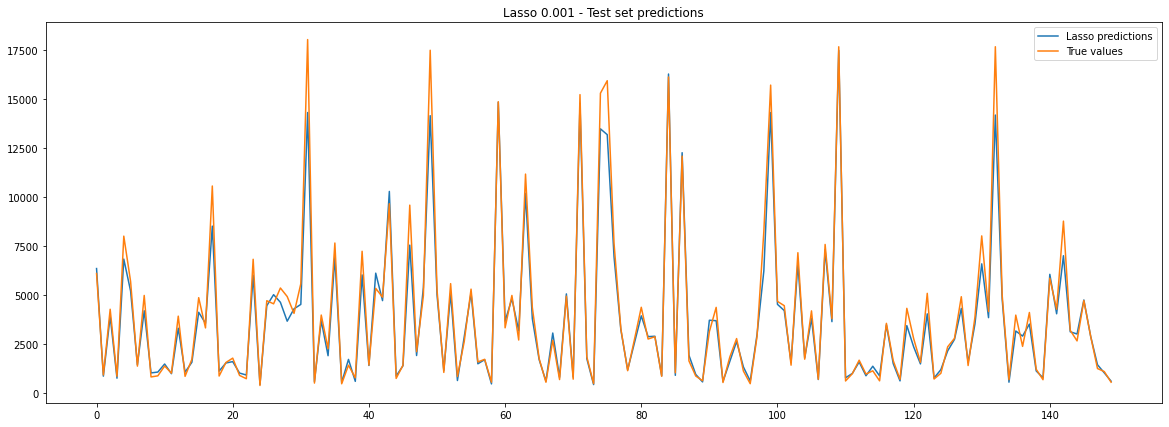

In [360]:
sample_size = 150
y_pred = np.exp(lassocv_pred_test)
y_true = np.exp(y_test)
x = [i for i in range(sample_size)]
fig = plt.figure(figsize=(20,7))
plt.plot(x, y_pred[:sample_size], label = "Lasso predictions")
plt.plot(x, y_true[:sample_size], label = "True values")
plt.title("Lasso 0.001 - Test set predictions")
plt.legend()
plt.show()

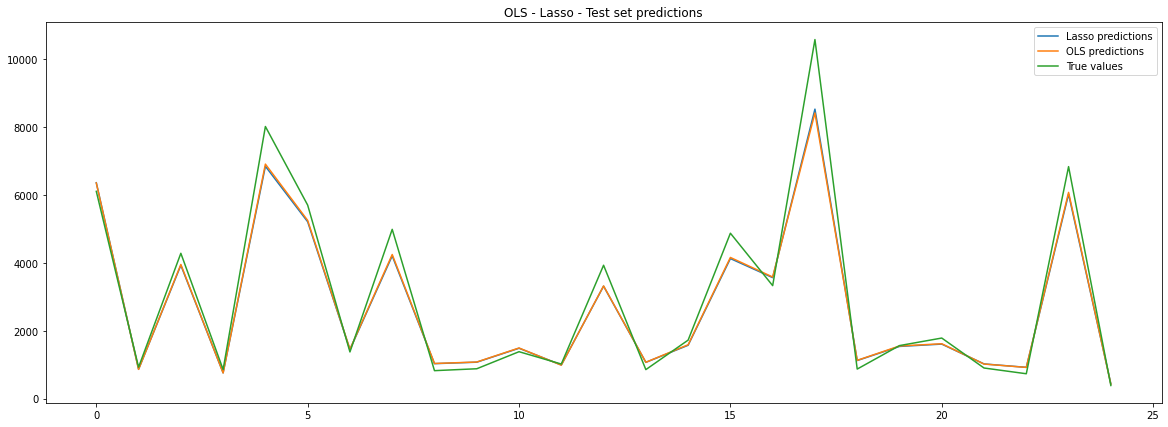

In [363]:
sample_size = 25
y_pred = np.exp(lassocv_pred_test)
y_true = np.exp(y_test)
x = [i for i in range(sample_size)]
fig = plt.figure(figsize=(20,7))
plt.plot(x, y_pred[:sample_size], label = "Lasso predictions")
plt.plot(x, np.exp(ols_pred_test)[:sample_size], label = "OLS predictions")
plt.plot(x, y_true[:sample_size], label = "True values")
plt.title("OLS - Lasso - Test set predictions")
plt.legend()
plt.show()